# Crisis/ Conflict Risk Management (CRM)

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("CRM.csv").convert_dtypes()

In [3]:
rows, columns = df.shape
print(f"Rows: {rows}, Columns: {columns}")

Rows: 58725, Columns: 7


In [4]:
df['date'] = pd.to_datetime(df['yearmon'], errors='coerce').dt.date
df = df.convert_dtypes()
df = df.set_index(['date']).sort_index()
df = df.drop(columns=['yearmon'])

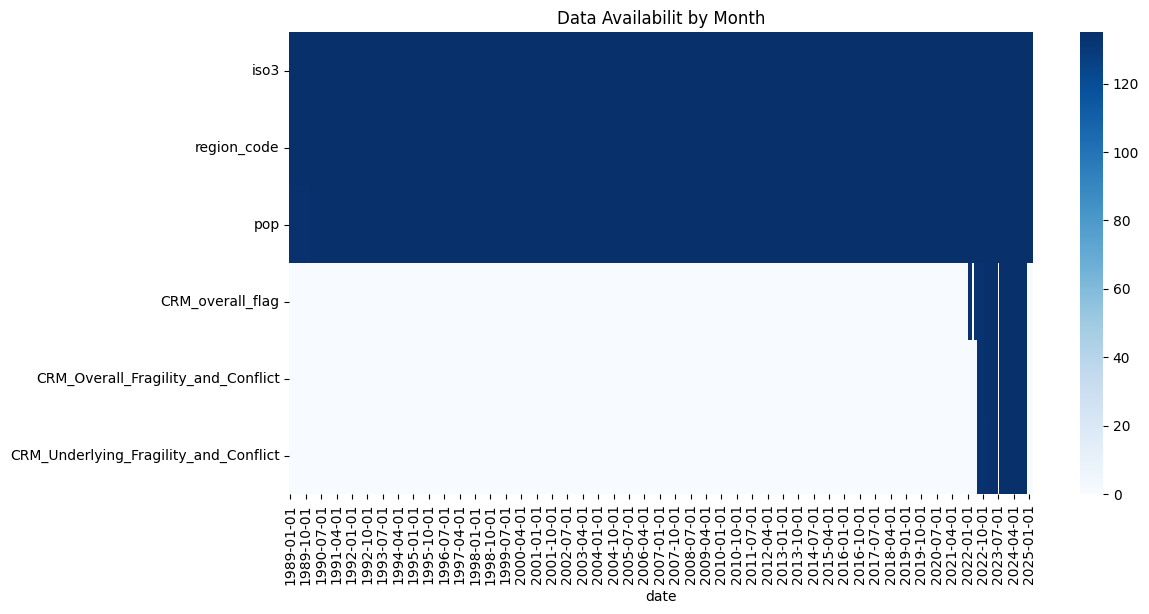

In [5]:
missing_by_month = df.groupby('date').count()
plt.figure(figsize=(12, 6))
sns.heatmap(missing_by_month.astype(float).T, cmap='Blues')
plt.title('Data Availabilit by Month')
plt.show()

In [6]:
df.tail().T

date,2025-03-01,2025-03-01,2025-03-01,2025-03-01,2025-03-01
iso3,BLZ,TUV,ZMB,TUN,ZWE
region_code,LAC,EAP,SSA,MNA,SSA
pop,411106.0,9816.0,20723965.0,12200431.0,16340822.0
CRM_overall_flag,<NA>,<NA>,<NA>,<NA>,<NA>
CRM_Overall_Fragility_and_Conflict,<NA>,<NA>,<NA>,<NA>,<NA>
CRM_Underlying_Fragility_and_Conflict,<NA>,<NA>,<NA>,<NA>,<NA>


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58725 entries, 1989-01-01 to 2025-03-01
Data columns (total 6 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso3                                   58725 non-null  string 
 1   region_code                            58725 non-null  string 
 2   pop                                    58713 non-null  Float64
 3   CRM_overall_flag                       4304 non-null   Float64
 4   CRM_Overall_Fragility_and_Conflict     3772 non-null   Float64
 5   CRM_Underlying_Fragility_and_Conflict  3769 non-null   Float64
dtypes: Float64(4), string(2)
memory usage: 3.4+ MB


In [8]:
df.describe(include='string').T

,count,unique,top,freq
iso3,58725,135,AFG,435
region_code,58725,6,SSA,20445


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pop,58713.0,41259533.486332,153319719.021372,8662.0,2108617.0,8303151.0,25698326.0,1438069596.0
CRM_overall_flag,4304.0,1.313662,1.275273,0.0,0.5,1.0,2.0,6.0
CRM_Overall_Fragility_and_Conflict,3772.0,2.691432,3.565806,0.0,0.0,0.0,5.0,10.0
CRM_Underlying_Fragility_and_Conflict,3769.0,4.242792,3.997429,0.0,0.0,3.158,10.0,10.0


In [10]:
total_rows = len(df)
missing_count = df.isnull().sum()
missing_percent = (missing_count / total_rows * 100).round(2)
missing_df = pd.DataFrame({'Missing Count': missing_count, 'Missing Percentage (%)': missing_percent})
missing_df = missing_df.sort_values(by='Missing Percentage (%)', ascending=False)
missing_df

,Missing Count,Missing Percentage (%)
CRM_Overall_Fragility_and_Conflict,54953,93.58
CRM_Underlying_Fragility_and_Conflict,54956,93.58
CRM_overall_flag,54421,92.67
pop,12,0.02
region_code,0,0.00
iso3,0,0.00


In [12]:
columns = missing_df[missing_df['Missing Percentage (%)'] < 70].index
df = df[columns]

numeric_df = df.select_dtypes(include=['number']).dropna()


## Since all indicators are dropped, further PCA cant be done.